In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

In [2]:
def read_dataset(fname):
    # 指定索引
    data = pd.read_csv(fname, index_col=False) 
    labels = data['class'].unique().tolist()
    data['class'] = data['class'].apply(lambda n: labels.index(n))
    data['age'] = [int(i) for i in data['age'].replace('?',0)]
    data['bp'] = [int(i) for i in data['bp'].replace('?',0)]
    data['sg'] = [float(i) for i in data['sg'].replace('?',0)]
    data['al'] = [int(i) for i in data['al'].replace('?',0)]
    data['su'] = [int(i) for i in data['su'].replace('?',0)]
    data['rbc'] = [i for i in data['rbc'].replace(['?','normal','abnormal'],[0,0,1])] #0:normal 1:abnormal
    data['pc'] = [i for i in data['pc'].replace(['?','normal','abnormal'],[0,0,1])] #0:normal 1:abnormal
    data['pcc'] = [i for i in data['pcc'].replace(['?','notpresent','present'],[0,0,1])] #0:notpresent 1:present
    data['ba'] = [i for i in data['ba'].replace(['?','notpresent','present'],[0,0,1])] #0:notpresent 1:present
    data['bgr'] = [int(i) for i in data['bgr'].replace('?',0)]
    data['bu'] = [float(i) for i in data['bu'].replace('?',0)]
    data['sc'] = [float(i) for i in data['sc'].replace('?',0)]
    data['sod'] = [float(i) for i in data['sod'].replace('?',0)]
    data['pot'] = [float(i) for i in data['pot'].replace('?',0)]
    data['hemo'] = [float(i) for i in data['hemo'].replace('?',0)]
    data['pcv'] = [int(i) for i in data['pcv'].replace('?',0)]
    data['wc'] = [int(i) for i in data['wc'].replace('?',0)]
    data['rc'] = [float(i) for i in data['rc'].replace('?',0)]
    data['htn'] = [i for i in data['htn'].replace(['yes','no','?'],[0,1,0])] #0:yes 1:no
    data['dm'] = [i for i in data['dm'].replace(['yes','no','?'],[0,1,0])] #0:yes 1:no
    data['cad'] = [i for i in data['cad'].replace(['yes','no','?'],[0,1,0])] #0:yes 1:no
    data['appet'] = [i for i in data['appet'].replace(['poor','good','?'],[1,0,0])] #1:poor 0:good
    data['pe'] = [i for i in data['pe'].replace(['yes','no','?'],[0,1,0])] #0:yes 1:no
    data['ane'] = [i for i in data['ane'].replace(['yes','no','?'],[0,1,0])] #0:yes 1:no
    # 處理遺缺值
    #data = data.fillna(0)
    return data

train = read_dataset('chronic_kidney_disease_full.csv')

In [ ]:
train['age'].unique().tolist()

In [4]:
train.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,0,0,0,0,121,36.0,1.2,0.0,0.0,15.4,44,7800,5.2,0,0,1,0,1,1,0
1,7,50,1.020,4,0,0,0,0,0,0,18.0,0.8,0.0,0.0,11.3,38,6000,0.0,1,1,1,0,1,1,0
2,62,80,1.010,2,3,0,0,0,0,423,53.0,1.8,0.0,0.0,9.6,31,7500,0.0,1,0,1,1,1,0,0
3,48,70,1.005,4,0,0,1,1,0,117,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,0,1,1,1,0,0,0
4,51,80,1.010,2,0,0,0,0,0,106,26.0,1.4,0.0,0.0,11.6,35,7300,4.6,1,1,1,0,1,1,0


In [10]:
from sklearn.model_selection import train_test_split

y = train['class'].values
X = train.drop(['class'], axis=1).values

#切分訓練與驗證資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print('train dataset: {0}; test dataset: {1}'.format(
    X_train.shape, X_test.shape))


train dataset: (320, 24); test dataset: (80, 24)


In [11]:
train.fillna(0)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,0,0,0,0,121,36.0,1.2,0.0,0.0,15.4,44,7800,5.2,0,0,1,0,1,1,0
1,7,50,1.020,4,0,0,0,0,0,0,18.0,0.8,0.0,0.0,11.3,38,6000,0.0,1,1,1,0,1,1,0
2,62,80,1.010,2,3,0,0,0,0,423,53.0,1.8,0.0,0.0,9.6,31,7500,0.0,1,0,1,1,1,0,0
3,48,70,1.005,4,0,0,1,1,0,117,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,0,1,1,1,0,0,0
4,51,80,1.010,2,0,0,0,0,0,106,26.0,1.4,0.0,0.0,11.6,35,7300,4.6,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,0,0,0,0,140,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,1,1,1,0,1,1,1
396,42,70,1.025,0,0,0,0,0,0,75,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,1,1,1,0,1,1,1
397,12,80,1.020,0,0,0,0,0,0,100,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,1,1,1,0,1,1,1
398,17,60,1.025,0,0,0,0,0,0,114,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,1,1,1,0,1,1,1


In [12]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=3)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))


train score: 1.0; test score: 0.975


best param: 6; best score: 0.975


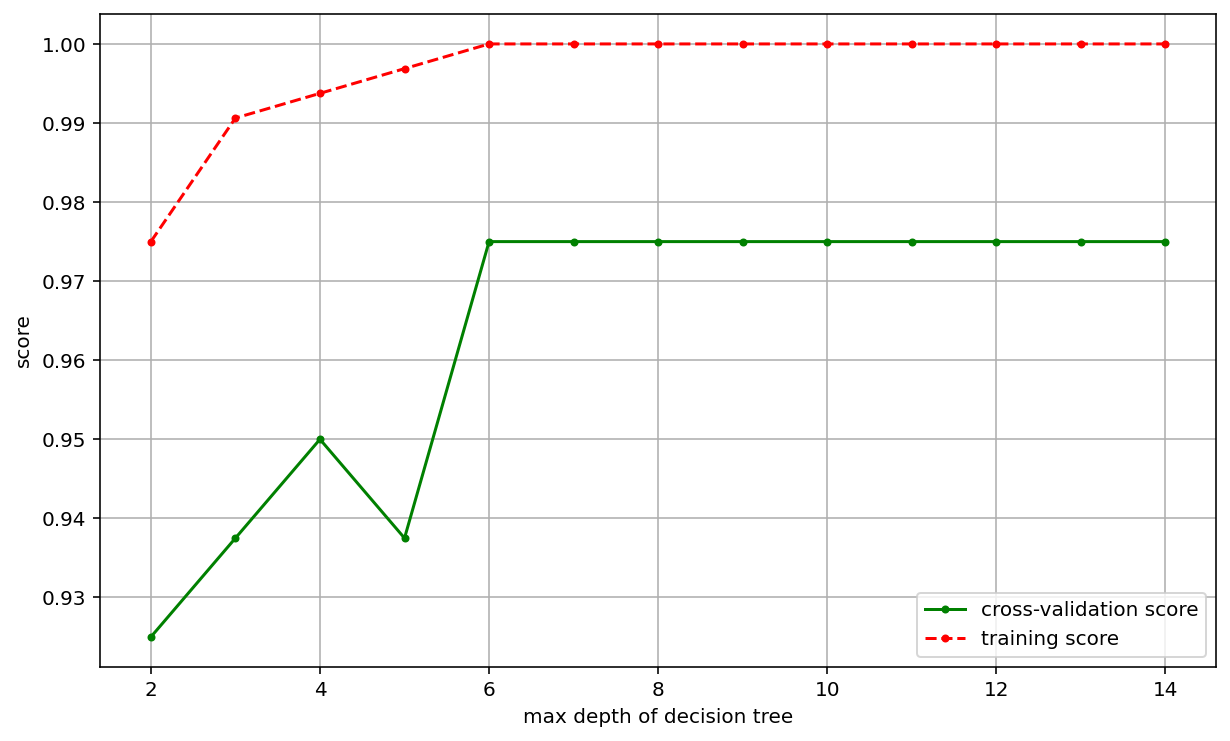

In [13]:
from sklearn.tree import DecisionTreeClassifier

#調整參數max_depth
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d, random_state=3)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

#設定深度2~15
depths = range(2, 15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

#找出驗證資料集分數最高的索引
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
#列印最好的參數
print('best param: {0}; best score: {1}'.format(best_param, best_score))

plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cross-validation score')
plt.plot(depths, tr_scores, '.r--', label='training score')
plt.legend()


best param: 0.0; best score: 0.95


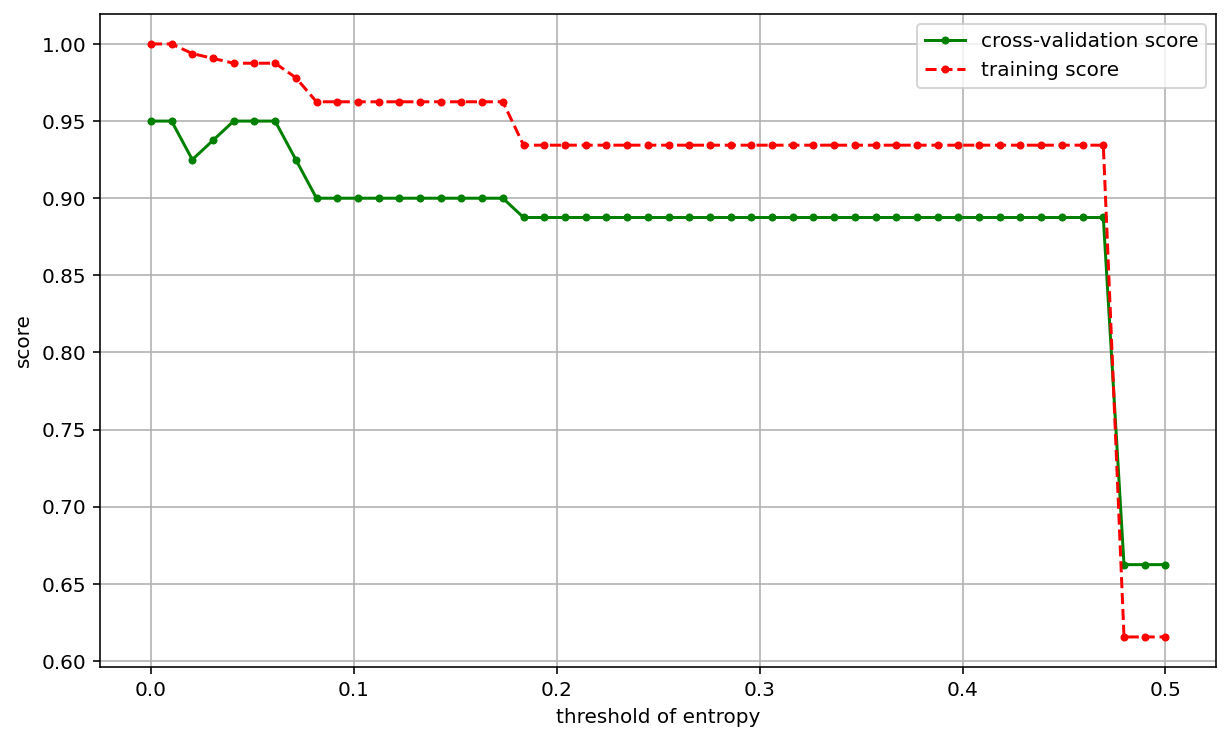

In [14]:
warnings.filterwarnings('ignore')
#利用基尼不純度
#設定閥值參數(min_impurity_split)，當information gain低於這個閥值時，則不進行分歧
def cv_score(val):
    clf = DecisionTreeClassifier(criterion='gini', min_impurity_split=val)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

# 指定閥值範圍
values = np.linspace(0, 0.5, 50)
scores = [cv_score(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

# 找出分數最高的參數
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

# 畫圖
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values, cv_scores, '.g-', label='cross-validation score')
plt.plot(values, tr_scores, '.r--', label='training score')
plt.legend()

In [15]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(10, 6), dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

best param: {'min_impurity_split': 0.0}
best score: 0.9675


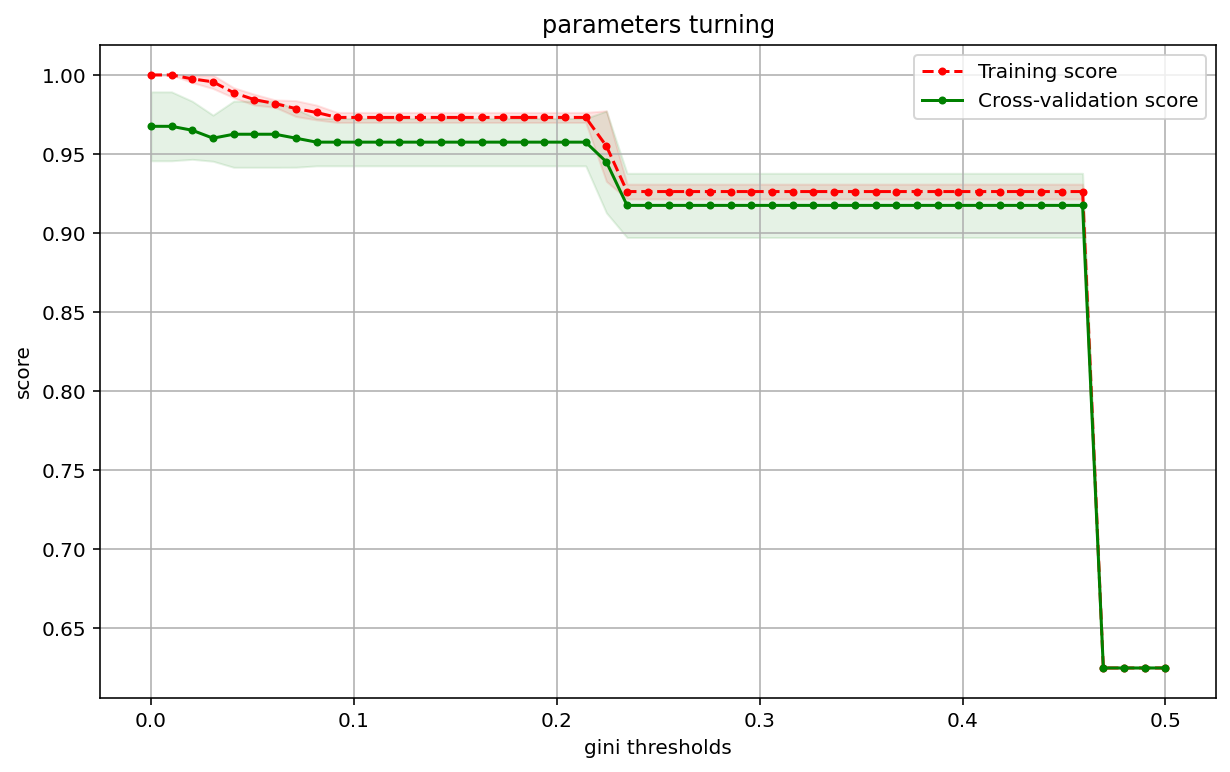

In [16]:
warnings.filterwarnings('ignore')
#透過GridSearchCV進行
#優點: 1. 內建交驗驗證，讓資料樣本穩定 2. 可以同時設定多個參數
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.5, 50)
param_grid = {'min_impurity_split': thresholds}

#每次計算時，都把資料切成5份，拿其中一份做為交叉驗證資料集，其他做為訓練資料集
clf = GridSearchCV(DecisionTreeClassifier(random_state=3), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

plot_curve(thresholds, clf.cv_results_, xlabel='gini thresholds')

In [17]:
warnings.filterwarnings('ignore')
#進行多個參數設定
from sklearn.model_selection import GridSearchCV

entropy_thresholds = np.linspace(0, 1, 50)
gini_thresholds = np.linspace(0, 0.5, 50)

#ID3
param_grid = [{'criterion': ['entropy'], 
               'min_impurity_split': entropy_thresholds},
              {'criterion': ['gini'], 
               'min_impurity_split': gini_thresholds},
              {'max_depth': range(2, 10)},
              {'min_samples_split': range(2, 30, 2)}]

clf = GridSearchCV(DecisionTreeClassifier(random_state=3), param_grid, cv=5)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

best param: {'max_depth': 4}
best score: 0.9724999999999999


## 生成決策數圖形

In [19]:
clf = DecisionTreeClassifier(random_state=3)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

from sklearn import tree

with open("chronic_kidney_disease_full.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

train score: 1.0; test score: 0.975


# 開啟 titanic.dot檔案，將內文複製貼上
# https://dreampuf.github.io/GraphvizOnline/
